In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2


In [ ]:
train_dir = 'Squirrel_Classifier_Data/Training'
validation_dir = 'Squirrel_Classifier_Data/Validation'
test_dir = 'Squirrel_Classifier_Data/Testing'

img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

batch_size = 32
epochs = 50
learning_rate = 1e-4 


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)


Found 2920 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [ ]:
base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False, 
    weights='imagenet',
    pooling='avg'
)

base_model.trainable = False

In [ ]:
model = Sequential([
    base_model,
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint(
    'modelv3.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

/opt/anaconda3/envs/my-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.2093 - loss: 2.0986 - val_accuracy: 0.4826 - val_loss: 1.5045 - learning_rate: 1.0000e-04
Epoch 2/50
 1/91 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.2188 - loss: 1.8535

/opt/anaconda3/envs/my-env/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.2188 - loss: 1.8535 - val_accuracy: 0.4809 - val_loss: 1.5035 - learning_rate: 1.0000e-04
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - accuracy: 0.3683 - loss: 1.6078 - val_accuracy: 0.5608 - val_loss: 1.3097 - learning_rate: 1.0000e-04
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4062 - loss: 1.4752 - val_accuracy: 0.5642 - val_loss: 1.3047 - learning_rate: 1.0000e-04
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 225ms/step - accuracy: 0.4083 - loss: 1.4971 - val_accuracy: 0.6302 - val_loss: 1.1973 - learning_rate: 1.0000e-04
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5625 - loss: 1.3273 - val_accuracy: 0.6337 - val_loss: 1.1919 - learning_rate: 1.0000e-04
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - accuracy: 0.4692 - loss: 1.3570 - val_accuracy: 0.6146 - val_loss: 1.1163 - learning_rate: 1.0000e-04
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4688 - los

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.7673 - loss: 0.7014
Test accuracy: 0.7700
Test loss: 0.6747


In [11]:
model.save('modelv3.1.keras')

In [ ]:
base_model.trainable = True
model.compile(
    optimizer=Adam(learning_rate=1e-5), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history_fine = model.fit(
    train_generator,
    initial_epoch=history.epoch[-1],
    epochs=epochs + 10,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

Epoch 50/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 78s 761ms/step - accuracy: 0.4867 - loss: 1.3348 - val_accuracy: 0.7257 - val_loss: 0.7952 - learning_rate: 1.0000e-05
Epoch 51/60
 1/91 ━━━━━━━━━━━━━━━━━━━━ 1:04 716ms/step - accuracy: 0.3750 - loss: 1.4132

/opt/anaconda3/envs/my-env/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3750 - loss: 1.4132 - val_accuracy: 0.7257 - val_loss: 0.7890 - learning_rate: 1.0000e-05
Epoch 52/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 71s 776ms/step - accuracy: 0.5753 - loss: 1.1127 - val_accuracy: 0.7361 - val_loss: 0.8051 - learning_rate: 1.0000e-05
Epoch 53/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5312 - loss: 0.9531 - val_accuracy: 0.7292 - val_loss: 0.8191 - learning_rate: 1.0000e-05
Epoch 54/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 69s 759ms/step - accuracy: 0.6049 - loss: 1.0596 - val_accuracy: 0.7274 - val_loss: 0.7983 - learning_rate: 1.0000e-05
Epoch 55/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5938 - loss: 1.0273 - val_accuracy: 0.7326 - val_loss: 0.7935 - learning_rate: 1.0000e-05
Epoch 56/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 69s 754ms/step - accuracy: 0.6228 - loss: 1.0125 - val_accuracy: 0.7361 - val_loss: 0.8121 - learning_rate: 1.0000e-05
Epoch 57/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6875

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.7078 - loss: 0.8137
Test accuracy: 0.7033
Test loss: 0.7763


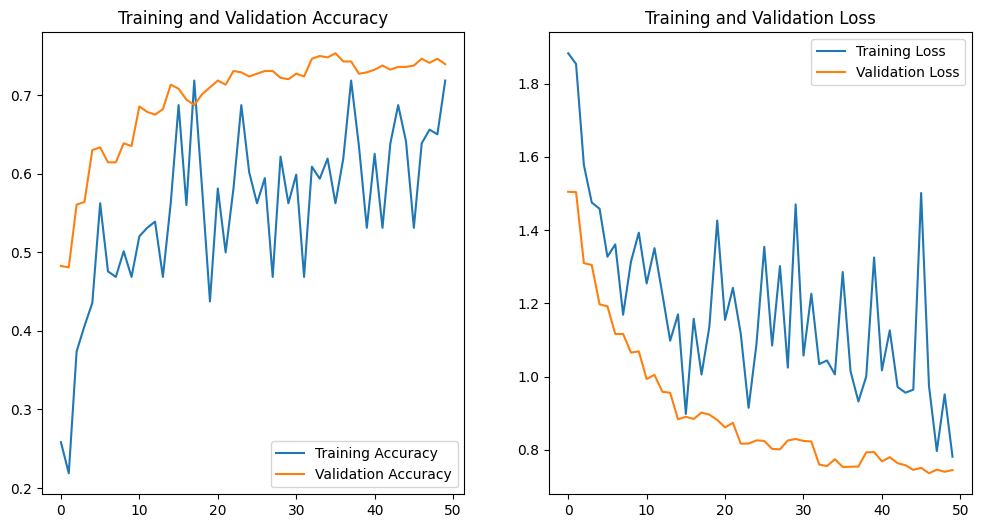

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()